In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("twitter_validation.csv")

In [6]:
df

,S_No,Company,Response,Comment
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [7]:
df.shape

(1000, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   S_No      1000 non-null   int64 
 1   Company   1000 non-null   object
 2   Response  1000 non-null   object
 3   Comment   1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [11]:
df.Company.unique()

array(['Facebook', 'Amazon', 'Microsoft', 'CS-GO', 'Google', 'FIFA',
       'MaddenNFL', 'TomClancysRainbowSix', 'AssassinsCreed',
       'CallOfDuty', 'Dota2', 'Verizon', 'NBA2K', 'Nvidia',
       'GrandTheftAuto(GTA)', 'RedDeadRedemption(RDR)', 'Hearthstone',
       'ApexLegends', 'Overwatch', 'PlayerUnknownsBattlegrounds(PUBG)',
       'Borderlands', 'PlayStation5(PS5)', 'johnson&johnson', 'Fortnite',
       'Xbox(Xseries)', 'CallOfDutyBlackopsColdWar', 'HomeDepot',
       'Cyberpunk2077', 'TomClancysGhostRecon', 'WorldOfCraft',
       'LeagueOfLegends', 'Battlefield'], dtype=object)

In [12]:
df.Company.value_counts()

RedDeadRedemption(RDR)               40
johnson&johnson                      39
FIFA                                 38
PlayerUnknownsBattlegrounds(PUBG)    38
LeagueOfLegends                      37
ApexLegends                          36
TomClancysRainbowSix                 35
Nvidia                               35
GrandTheftAuto(GTA)                  35
Amazon                               34
Fortnite                             34
Facebook                             33
PlayStation5(PS5)                    33
AssassinsCreed                       33
Borderlands                          33
Overwatch                            32
Hearthstone                          32
Verizon                              32
CS-GO                                32
CallOfDuty                           31
Cyberpunk2077                        30
WorldOfCraft                         30
MaddenNFL                            29
Microsoft                            28
Dota2                                27


In [13]:
df.Company.value_counts()/len(df)*100

RedDeadRedemption(RDR)               4.0
johnson&johnson                      3.9
FIFA                                 3.8
PlayerUnknownsBattlegrounds(PUBG)    3.8
LeagueOfLegends                      3.7
ApexLegends                          3.6
TomClancysRainbowSix                 3.5
Nvidia                               3.5
GrandTheftAuto(GTA)                  3.5
Amazon                               3.4
Fortnite                             3.4
Facebook                             3.3
PlayStation5(PS5)                    3.3
AssassinsCreed                       3.3
Borderlands                          3.3
Overwatch                            3.2
Hearthstone                          3.2
Verizon                              3.2
CS-GO                                3.2
CallOfDuty                           3.1
Cyberpunk2077                        3.0
WorldOfCraft                         3.0
MaddenNFL                            2.9
Microsoft                            2.8
Dota2           

In [42]:
data = df.groupby(['Company', 'Response'])['S_No'].count().reset_index()

In [19]:
df.columns

Index(['S_No', 'Company', 'Response', 'Comment'], dtype='object')

In [44]:
data

,Company,Response,S_No
0,Amazon,Irrelevant,3
1,Amazon,Negative,6
2,Amazon,Neutral,18
3,Amazon,Positive,7
4,ApexLegends,Irrelevant,3
...,...,...,...
121,Xbox(Xseries),Positive,7
122,johnson&johnson,Irrelevant,3
123,johnson&johnson,Negative,13
124,johnson&johnson,Neutral,19


In [45]:
data.sort_values(by='S_No',ascending=False,inplace=True)
data

,Company,Response,S_No
11,AssassinsCreed,Positive,24
124,johnson&johnson,Neutral,19
73,MaddenNFL,Negative,18
101,RedDeadRedemption(RDR),Neutral,18
2,Amazon,Neutral,18
...,...,...,...
72,MaddenNFL,Irrelevant,1
106,TomClancysRainbowSix,Irrelevant,1
33,Cyberpunk2077,Negative,1
36,Dota2,Irrelevant,1


In [78]:
data.Response.unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [83]:
g = ['Neutral','Irrelevant', 'Positive','Negative']

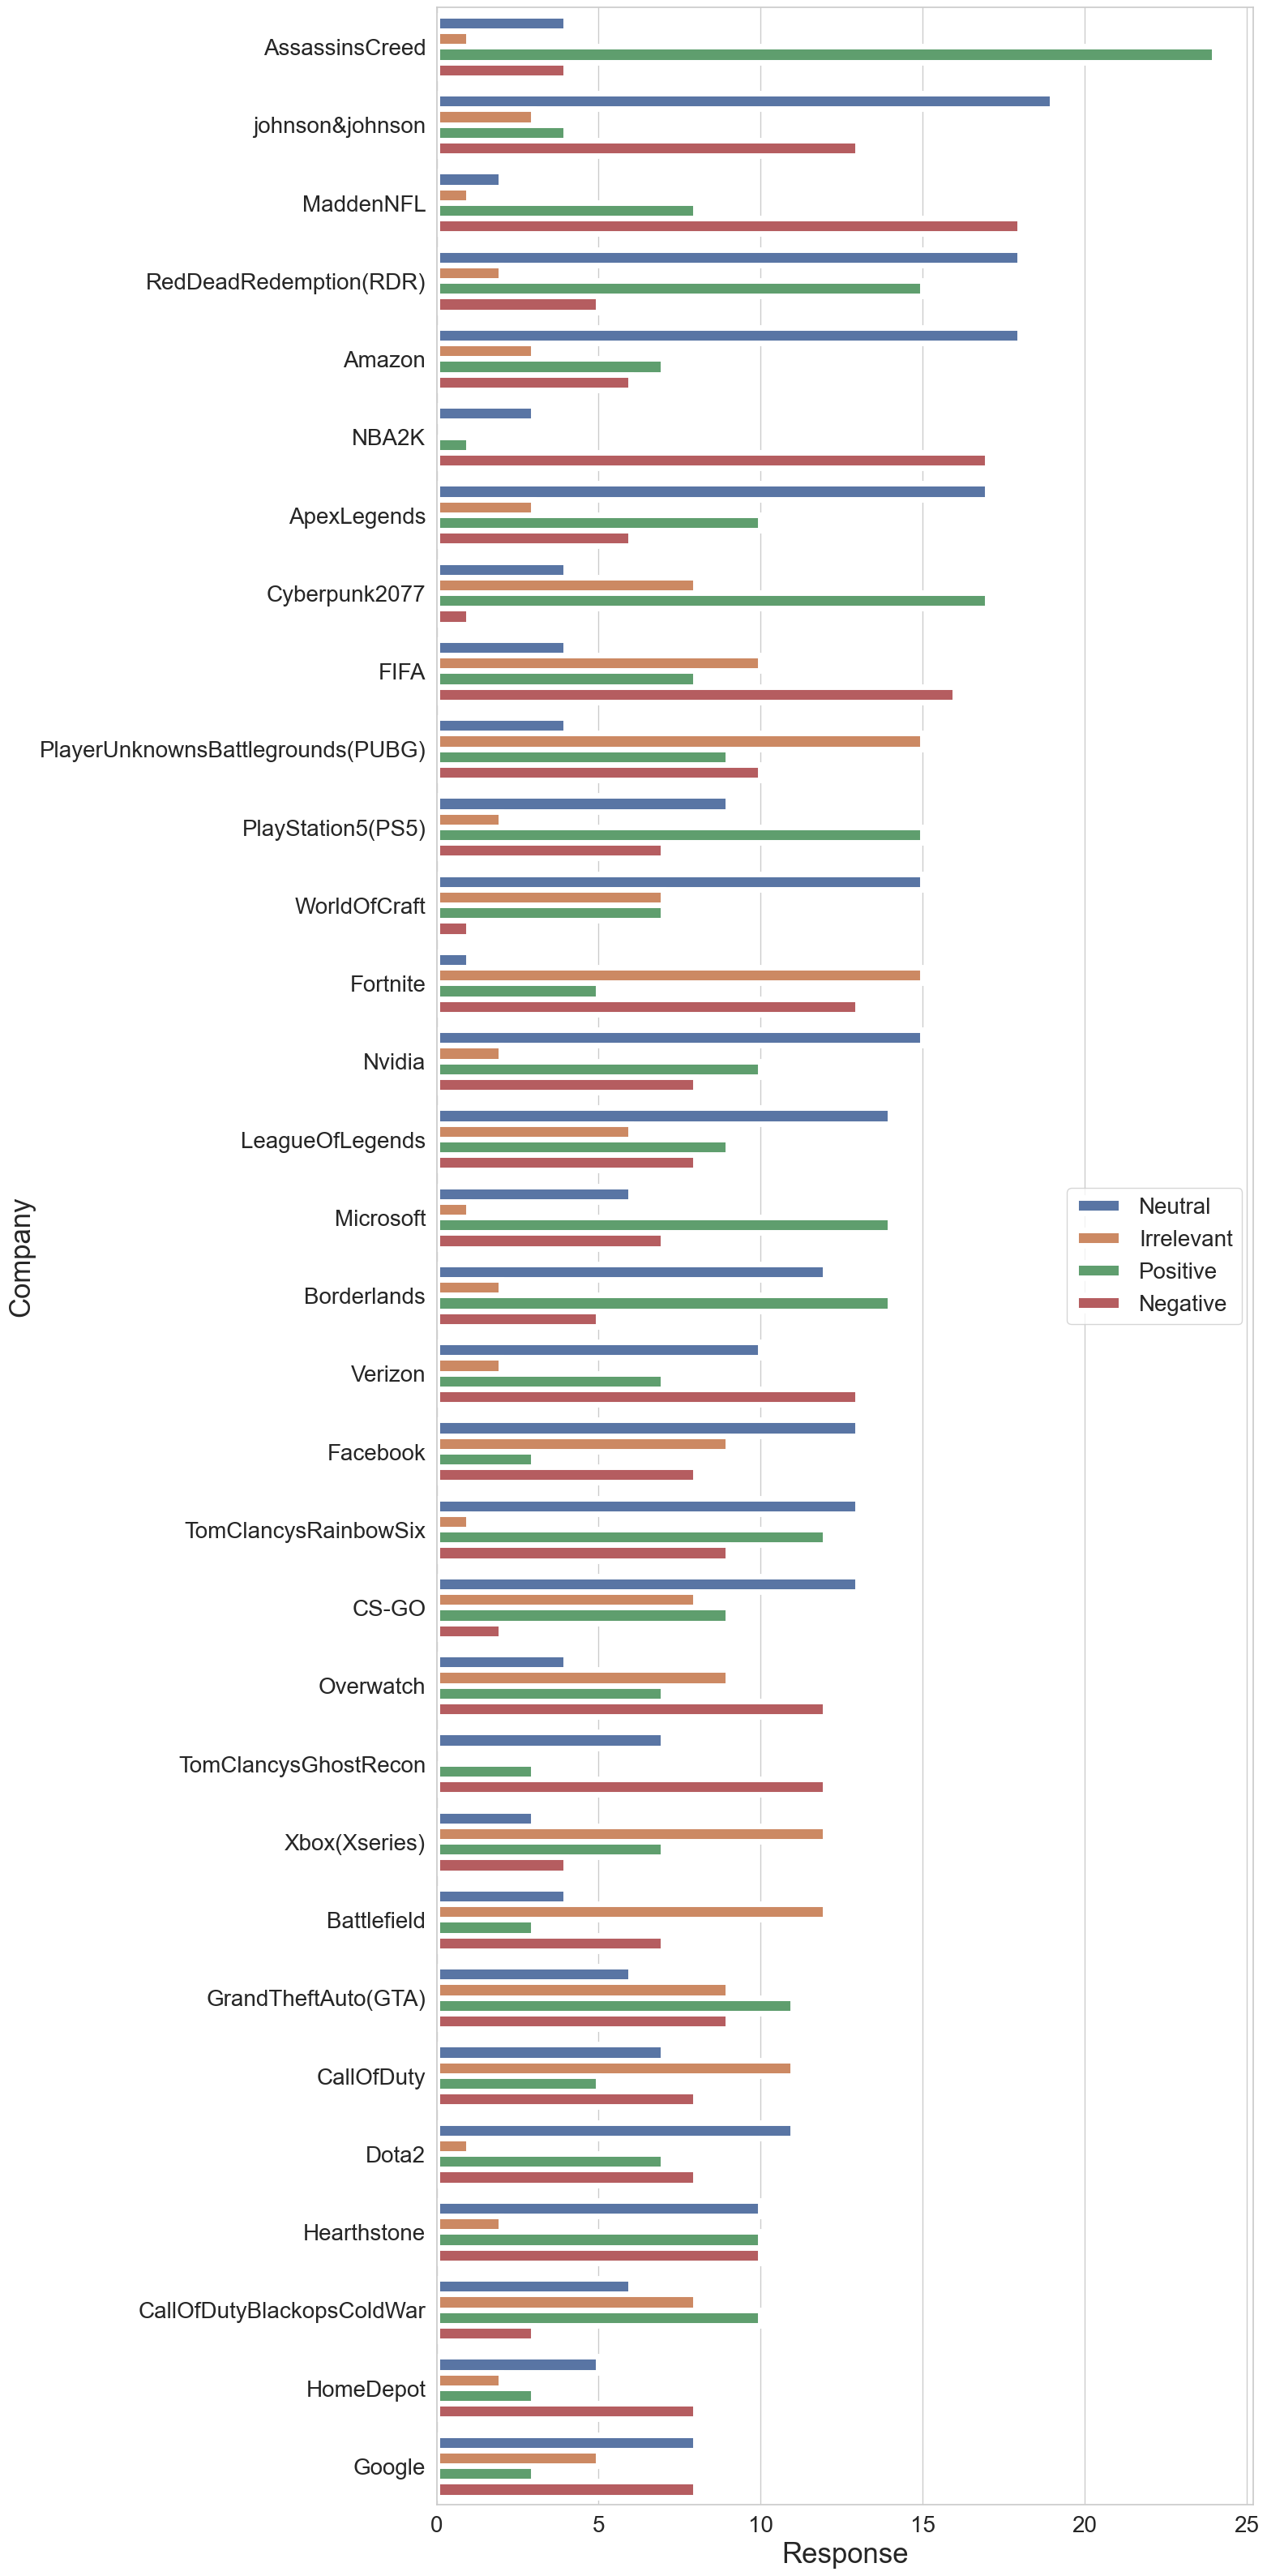

In [90]:
plt.figure(figsize=(13, 40))

# Increase the aspect ratio to make the bars wider
sns.set_theme(style="whitegrid")
ax = sns.barplot(data=data, x='S_No', y="Company", hue="Response",capsize= 4, linewidth=5, errcolor=".5",hue_order=g)


plt.yticks(fontsize=10)
plt.tick_params(axis='x', labelsize=20, rotation=0)
plt.tick_params(axis='y', labelsize=20, rotation=0)
plt.xlabel('Response', fontsize=25)
plt.ylabel('Company', fontsize=25)
plt.legend(loc='center right', fontsize=20)

plt.show()


# Conclusion:
